
* minist : 손글씨 데이터셋 0~9 10개의 숫자값에 대한 분류!  
    * 1장 데이터 : 28 by 28 2D  
    (ML : 28*28 = 756 1차원 벡터)  
    * 데이터 셋 : (60000, 28, 28) => 3D

* FashionMNIST : 의상관련된 이미지 분류 셋!!!!!  
    * 1장 데이터 : 28,28 --> 2D (흑백)  
    * DL을 통해서 10가지의 의상을 분류!!!  
    * 원래는 이미 셋이 이미지  
        --> CNN 구조를 사용해야 잘 나옴!!!
        --> 일반적인 Dense레이어를 쌓는 방식의 DNN 구조로 설계!!!!


In [4]:
import tensorflow as tf

import matplotlib.pyplot as plt

# 데이터셋 불러오기

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [3]:
(train_X, train_y), (test_X, test_y) = fashion_mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


# 2. 전처리 + EDA

In [ ]:
# 실제 프로젝트 : 각각 전처리!!!!
# ---> 이미지 데이터 전처리 : openCV(C/C++)
# + resize, crop, 색상변환(컬럼 -> 흑백변환, 차원 낮추기), 해상도 등...

In [9]:
train_X[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

9


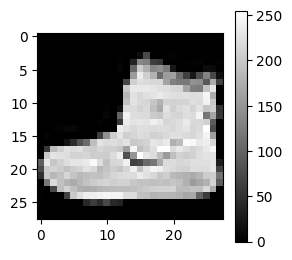

In [15]:
plt.figure(figsize= (3,3))
plt.imshow(train_X[0], cmap="gray")
plt .colorbar()
print(train_y[0])

In [16]:
# 데이터들의 경우에는 보면 8비트로 0~255까지의 값
# --> 이미지 표현의 경우에는 정해진 룰일 딱 존재해서...
# --> 일괄적으로 처리하는 경우들이 많이 있음

# 값 재조정 : 0~1 MinMaxScaler etc, 0을 중심으로 standardScale etc


# 정규화
train_X = train_X / 255.0
test_X = test_X / 255.0

## 모델 설계

In [17]:
# 모델을 설계 하는데 기준
# --> 1개 샘플을 기준으로 함 : train_X[0].shape
# --> 설계 방식 : 전통적인 DNN 구조로 설계!
    # 1) DNN으로 설계하기 위해서 flatten (2D->1D)
    #   input layer : 노드 (764개)
    # 2) HL(히든레이어) : 1개만 쌓을 거임(이유 없음. node =128, AF= Relu)
    # 3) OL(아웃풋레이어) : 10개에 대한 분류 -> node = 10 + AF : softmax

# 주의!
# 정답 train_y는 라벨인코딩! -> 원핫인코딩을 해야하는데
#                            -> 지금 주어진 정답 : 라벨인코딩 1D,
#                            -> OL 연결된 정답 : 원핫인코딩 2D

In [18]:
train_X.shape

(60000, 28, 28)

In [19]:
train_X[0].shape

(28, 28)

### 모델 구조 설계

In [20]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape = (28,28)),

        # HL : 일반적인 Dense 레이어로 기능
        # ++ 여러층 추가, 노드도 변경 AF 변경 가능(하이퍼 파라미터 영역)
        tf.keras.layers.Dense(units = 128, activation="relu"),

        # output layer 설계
        # 내 모델의 목적에 고정 : 분류 + 10종
        tf.keras.layers.Dense(units = 10, activation = "softmax")

    ]
)
model

In [21]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# 데이터 784 개 + bias 1개 가 같이 input 됨
print("1번 레이어 :" ,(784+1)*128)
print("2번 레이어 :", 128*10)

1번 레이어 : 100480
2번 레이어 : 1280


#### 모델 학습 세팅
    * weight 학습

In [23]:
model.compile(

    optimizer= tf.keras.optimizers.Adam(), # loss 최적화 GD
    loss = "categorical_crossentropy",# 정답을 OneHotEncoding
    metrics = ["accuracy"] # 잘 학습이 되는지 모니터링 지표

)

In [28]:
# 참고) 정답지의 모양을 OHEncoding 으로 방식으로 변환
# why 여러개의 분류 목적에 의한 output layer 의 노드와 연결
print("원래 정답지 모양 train_y[0] :",train_y[0])
# [0,0,0,0,0,0,0,0,1]
# ++
tf.keras.utils.to_categorical(train_y[0], num_classes=10)

원래 정답지 모양 train_y[0] : 9


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### 모델 학습

In [31]:
# 인공신경망으로 분류!
# + 정답에 대한 처리!!!!!
history = model.fit(
    train_X,
    tf.keras.utils.to_categorical(train_y, num_classes=10),

    # 얼마나 많은 train 데이터를 재활용할까 epoch
    epochs = 100, # overfit + 시간
    batch_size = 256, # HW 스펙에 따라서 다름 gpu -> ram
    validation_split = 0.25
)

Epoch 1/100
176/176 [==============================] - 3s 6ms/step - loss: 0.6587 - accuracy: 0.7772 - val_loss: 0.4785 - val_accuracy: 0.8327
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4481 - accuracy: 0.8457 - val_loss: 0.4398 - val_accuracy: 0.8471
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4075 - accuracy: 0.8583 - val_loss: 0.4055 - val_accuracy: 0.8577
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3848 - accuracy: 0.8639 - val_loss: 0.3987 - val_accuracy: 0.8581
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3608 - accuracy: 0.8717 - val_loss: 0.3868 - val_accuracy: 0.8604
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3409 - accuracy: 0.8791 - val_loss: 0.3740 - val_accuracy: 0.8672
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3322 - accuracy: 0.8812 - val_loss: 0.3515 - val_accuracy: 0.8753

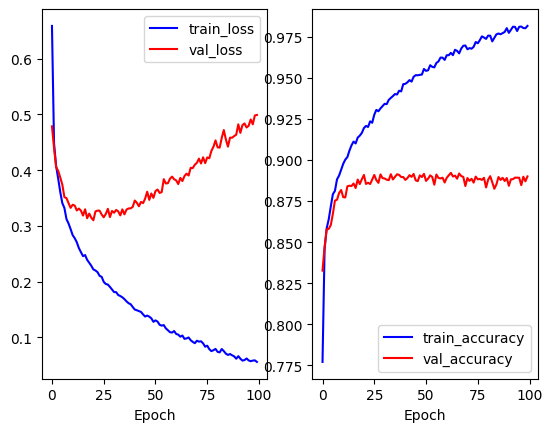

In [32]:
# 위의 결과를 그래프로 그려보자!!!
plt.subplot(1,2,1) # loss

plt.plot(history.history["loss"], "b-", label="train_loss")
plt.plot(history.history["val_loss"], "r-", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2) # metrics : accuracy
plt.plot(history.history["accuracy"], "b-", label="train_accuracy")
plt.plot(history.history["val_accuracy"], "r-", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

#### 평가

In [34]:
# 실제 평가 : X_test에 대해서 진행!
# 주의해야할 부분 : test_y ---> OH인코딩!!!!!!!

# model.evaluate( test_X, test_y) # 이렇게 하면 오류남

model.evaluate( test_X, tf.keras.utils.to_categorical(test_y))

313/313 [==============================] - 1s 4ms/step - loss: 0.5323 - accuracy: 0.8872


[0.5322598814964294, 0.8871999979019165]

In [35]:
y_pred = model.predict(test_X)
y_pred

313/313 [==============================] - 1s 1ms/step


array([[6.11643709e-16, 1.09650326e-17, 1.91028535e-13, ...,
        1.41294981e-06, 1.76678172e-10, 9.99998569e-01],
       [2.28642011e-06, 1.78079061e-18, 9.99956369e-01, ...,
        5.86620050e-19, 2.15877398e-16, 2.00291646e-24],
       [1.21990213e-11, 1.00000000e+00, 5.36215564e-17, ...,
        2.26594267e-27, 2.91263813e-19, 1.81139377e-31],
       ...,
       [1.29712974e-09, 3.04469839e-18, 2.29383623e-10, ...,
        1.41936169e-17, 1.00000000e+00, 1.27126652e-14],
       [1.62937521e-08, 9.99999523e-01, 1.73503382e-11, ...,
        1.96433124e-14, 1.25167801e-11, 7.20115648e-17],
       [8.29939520e-11, 7.35910681e-13, 2.78343615e-14, ...,
        2.86246859e-06, 3.68970375e-11, 7.60038598e-14]], dtype=float32)

In [50]:
y_pred[0].sum()

1.0

In [38]:
y_pred[0].argmax() # -->  9+1번째 클래스가 가장 확률이 컸다!!!

9

<img src="https://drive.google.com/uc?id=1_axH4QGvO9sH34AzX1TTvhi15k-e8eUJ">

In [ ]:
y_pred[0][9]

0.9999896

In [ ]:
# 결론1) 다순하게 HL1 ---> X_test
#        ACCURACY : 0.87

* 성능을 향상 시키는 것이 목적!

### 시도2) HL 추가 - 비선형 획득

In [51]:
model = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten( input_shape =( 28,28)),

        # HL : 일반적인 Dense 레이어로 기능
        # ++ HL의 레이어만 더 쌓아서 구조 변경!!!!
        tf.keras.layers.Dense( units=128, activation="relu"),
        tf.keras.layers.Dense( units=64, activation="relu"),
        tf.keras.layers.Dense( units=32, activation="relu"),

        # output Layer 설계
        tf.keras.layers.Dense( units =10,activation="softmax" )
    ]
)
model

In [52]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = "categorical_crossentropy", # 정답을 OHE
    metrics =["accuracy"]
)

In [54]:
history = model.fit(
    train_X,
    tf.keras.utils.to_categorical(train_y, num_classes=10),
    epochs = 50,
    batch_size = 256,
    validation_split=0.25
)

Epoch 1/50
176/176 [==============================] - 3s 9ms/step - loss: 0.7230 - accuracy: 0.7492 - val_loss: 0.4749 - val_accuracy: 0.8313
Epoch 2/50
176/176 [==============================] - 1s 7ms/step - loss: 0.4375 - accuracy: 0.8459 - val_loss: 0.4197 - val_accuracy: 0.8530
Epoch 3/50
176/176 [==============================] - 1s 6ms/step - loss: 0.3898 - accuracy: 0.8633 - val_loss: 0.3897 - val_accuracy: 0.8627
Epoch 4/50
176/176 [==============================] - 1s 4ms/step - loss: 0.3645 - accuracy: 0.8687 - val_loss: 0.3779 - val_accuracy: 0.8657
Epoch 5/50
176/176 [==============================] - 1s 5ms/step - loss: 0.3397 - accuracy: 0.8788 - val_loss: 0.3649 - val_accuracy: 0.8675
Epoch 6/50
176/176 [==============================] - 1s 4ms/step - loss: 0.3186 - accuracy: 0.8845 - val_loss: 0.3536 - val_accuracy: 0.8744
Epoch 7/50
176/176 [==============================] - 1s 5ms/step - loss: 0.3039 - accuracy: 0.8891 - val_loss: 0.3399 - val_accuracy: 0.8775
Epoch 

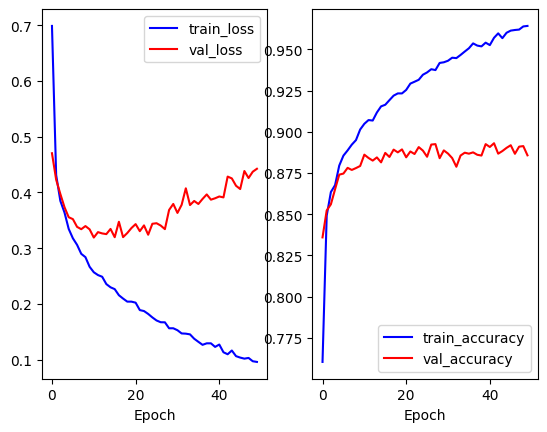

In [ ]:
plt.subplot(1,2,1) # loss

plt.plot(history.history["loss"], "b-", label="train_loss")
plt.plot(history.history["val_loss"], "r-", label="val_loss")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1,2,2) # metrics : accuracy
plt.plot(history.history["accuracy"], "b-", label="train_accuracy")
plt.plot(history.history["val_accuracy"], "r-", label="val_accuracy")
plt.xlabel("Epoch")
plt.legend()

In [ ]:
# 결론2)
# 실험1 IL-HL-OL :0.87
# 실험2 :IL-HL-HL-HL-OL : 0.88
# 1% 성능 향상
# 0.9% 넘기기가 정말 힘듬
# 설계 방싱 CNN : 0.9 가볍게 넘어감

# 결론) DL의 성능은 기본적으로 모델의 구조에 기인
# -> 모델의 구조 & 최신 설계 방식 계속 모니터링
#   논문 검색. 최신 기술 계속 참고할 것.